In [13]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..")
from data.utils import distinct_colors
from data.utils import *

import os

In [7]:
# dataset_path = "/space/ariyanzarei/sorghum_segmentation/dataset/S3DIS/ply_data_all_1.h5"
# with h5py.File(dataset_path,'r') as f:
#     points = np.array(f['data'])
#     labels = np.array(f['label'])

In [25]:
dataset_path = "/space/ariyanzarei/sorghum_segmentation/dataset/S3DIS/Area_1/office_25/Annotations"
list_points = os.listdir(dataset_path)
labels = []
points = []
current_label = 0
for f in list_points:
    p = np.loadtxt(os.path.join(dataset_path,f))
    l = np.full(p.shape[0],current_label)
    current_label+=1
    points.append(p)
    labels.append(l)

points = np.concatenate(points,0)
labels = np.concatenate(labels,0)

In [26]:
print(points.shape)
print(labels.shape)

(802847, 6)
(802847,)


40


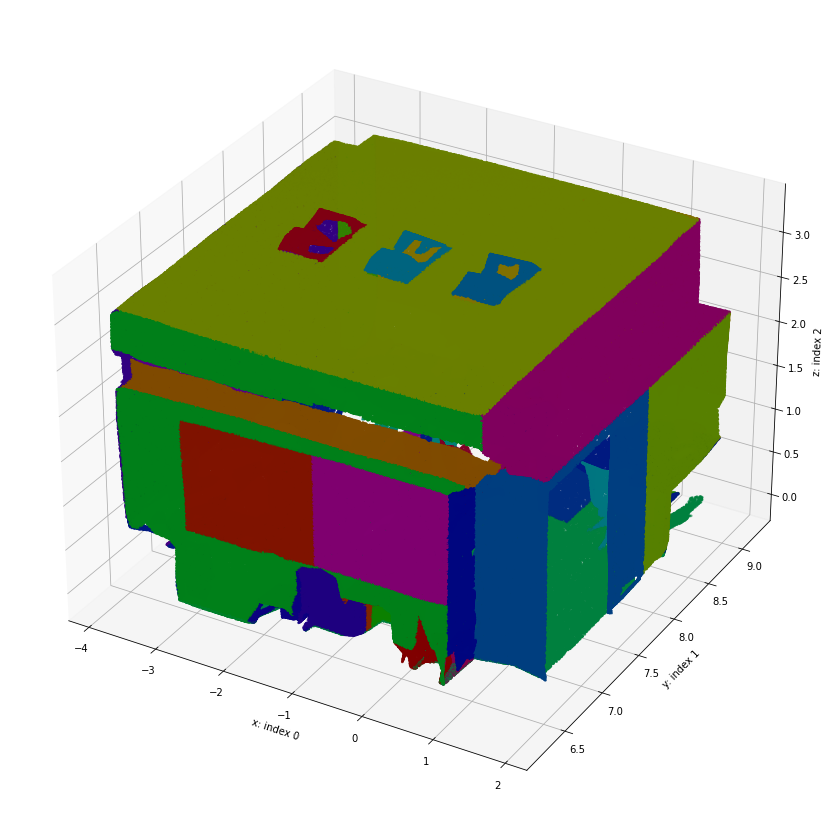

In [27]:
# index = 10
# p = points[index,:,:3]
# label = labels[index]

p = points
label = labels

print(max(label))

d_colors = distinct_colors(len(list(set(label))))
colors = np.zeros((label.shape[0],3))
for i, l in enumerate(list(set(label))):
    colors[label == l, :] = d_colors[i]
    
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(p[:,0],p[:,1],p[:,2], s=3, c=colors)
ax.set_xlabel("x: index 0")
ax.set_ylabel("y: index 1")
ax.set_zlabel("z: index 2")
plt.show()
